In [78]:
# Import Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [79]:
# Load dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn2.csv")

In [80]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0.0,No,No,-5.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,abc,151.65,Yes


In [81]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7048 entries, 0 to 7047
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7048 non-null   object 
 1   gender            7047 non-null   object 
 2   SeniorCitizen     7045 non-null   float64
 3   Partner           7048 non-null   object 
 4   Dependents        7048 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7048 non-null   object 
 7   MultipleLines     7048 non-null   object 
 8   InternetService   7048 non-null   object 
 9   OnlineSecurity    7048 non-null   object 
 10  OnlineBackup      7048 non-null   object 
 11  DeviceProtection  7048 non-null   object 
 12  TechSupport       7048 non-null   object 
 13  StreamingTV       7048 non-null   object 
 14  StreamingMovies   7048 non-null   object 
 15  Contract          7048 non-null   object 
 16  PaperlessBilling  7048 non-null   object 


In [82]:
# Check the dimension of the DataFrame
df.shape

(7048, 21)

In [83]:
# Find the duplicate rows
df.count()

duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
# Remove the duplicate rows
df = df.drop_duplicates()
df.head(5)

Number of duplicate rows:  (5, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,NaN,Yes
3,7795-CFOCW,Male,0.0,No,No,-5.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,abc,151.65,Yes


In [84]:
# Find the number of missing values
print(df.isnull().sum())

customerID           0
gender               1
SeniorCitizen        3
Partner              0
Dependents           0
tenure               8
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges         3
Churn                0
dtype: int64


In [85]:
# Convert 'TotalCharges' to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [86]:
# Find missing values in 'Totalcharges'
print("Missing values in TotalCharges:", df["TotalCharges"].isna().sum())

Missing values in TotalCharges: 14


In [87]:
# Impute with 0
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [88]:
# Find missing values after filling 'TotalCharges'
print("Missing values after:", df.isnull().sum())

Missing values after: customerID           0
gender               1
SeniorCitizen        3
Partner              0
Dependents           0
tenure               8
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64


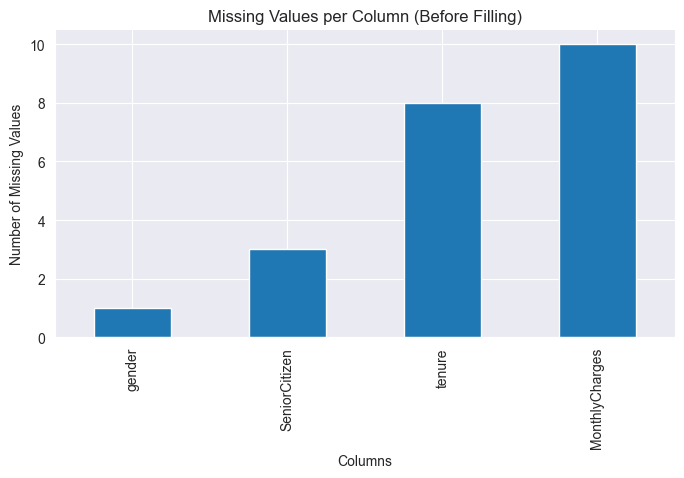

In [89]:
# Bar chart of missing values per column
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

missing_counts.plot(kind="bar", figsize=(8,4))
plt.title("Missing Values per Column (Before Filling)")
plt.ylabel("Number of Missing Values")
plt.xlabel("Columns")

plt.savefig('../results/eda_visualizations/IT24102374/totalcharges_distribution1.png',
            dpi=300, bbox_inches='tight')
plt.show()


plt.close()

In [90]:
# Convert columns to numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [91]:
# Fill numeric columns with missing values with median
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].median())
df['tenure'] = df['tenure'].fillna(df['tenure'].median())
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [92]:
# Fill categorical columns with missing values with mode
df['SeniorCitizen'] = df['SeniorCitizen'].fillna(df['SeniorCitizen'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [93]:
# Find the number of missing values after handling
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [94]:
# Standardize categorical data
# Step 1: lowercase + strip all text columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

# Step 2: Fix inconsistencies
df['InternetService'] = df['InternetService'].replace({'dsl': 'dsl', 'fiber optic': 'fiber optic'})
df['Contract'] = df['Contract'].replace({'12 months': 'one year'})

# Step 3: Drop rows where churn == 'maybe'
df = df[df['Churn'] != 'maybe']

In [95]:
df.to_csv("C:/Users/ASUS TUF/PycharmProjects/2025-Y2-S1-MLB-B6G2-07/data/cleaned_dataset.csv", index=False)